In [333]:
import os, geopandas as gpd

In [334]:
countries=gpd.read_file(os.path.join("data","World_Countries","World_Countries.shp"))

In [335]:
# what is it?
type(countries)

geopandas.geodataframe.GeoDataFrame

In [336]:
# dimensions
countries.shape

(252, 2)

In [337]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [338]:
# some content
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [339]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [340]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


<Axes: >

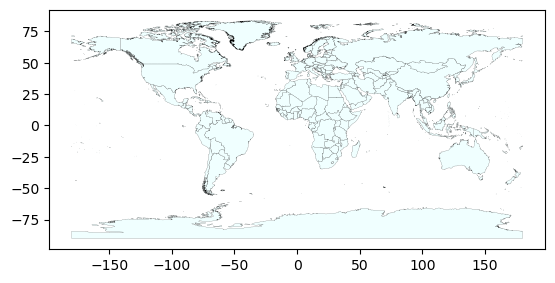

In [341]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

In [342]:
cities=gpd.read_file(os.path.join("data","World_Cities","World_Cities.shp"))
rivers=gpd.read_file(os.path.join("data","World_Hydrography","World_Hydrography.shp"))

<Axes: >

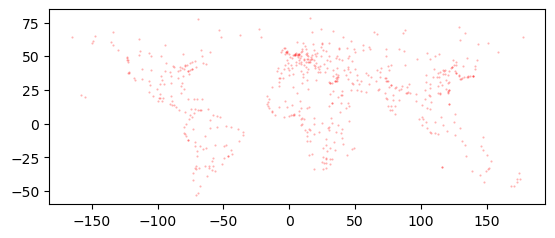

In [343]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

<Axes: >

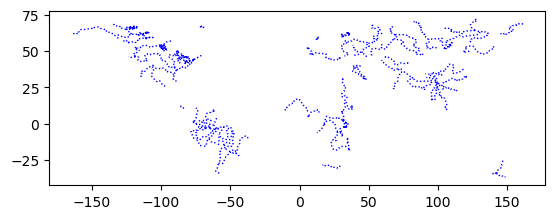

In [344]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

In [345]:
countries.crs==cities.crs==cities.crs

True

<Axes: >

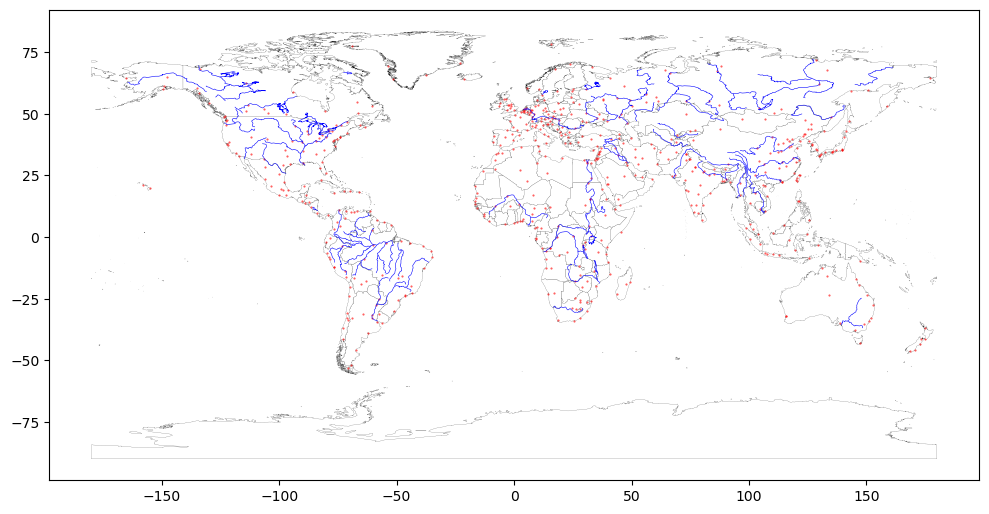

In [346]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...
rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...

In [347]:
countries.to_file(os.path.join("data","worldMap.gpkg"),layer='countryBorders', driver="GPKG")
rivers.to_file(os.path.join("data","worldMap.gpkg"),layer='riverLines', driver="GPKG")
cities.to_file(os.path.join("data","worldMap.gpkg"),layer='cityPoints', driver="GPKG")

# Subsetting

In [349]:
Algeria=countries[countries.COUNTRY=='Algeria']

In [350]:
citiesAlgeria_clipped = gpd.clip(gdf=cities,
                          mask=Algeria)
riversAlgeria_clipped = gpd.clip(gdf=rivers,
                               mask=Algeria)

ValueError: aspect must be finite and positive 

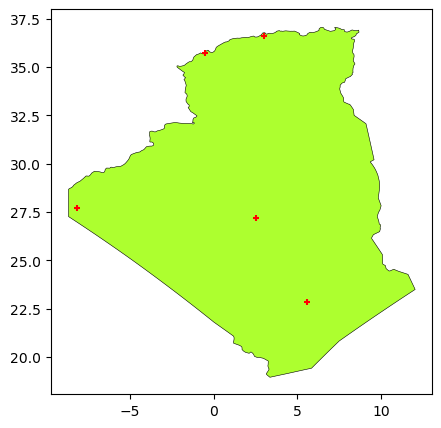

In [417]:
base = Algeria.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesAlgeria_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversAlgeria_clipped.plot(edgecolor='blue', linewidth=0.5,
                           ax=base)

In [419]:
Algeria.geom_type

3    Polygon
dtype: object

In [421]:
citiesAlgeria_clipped.geom_type

472    Point
437    Point
392    Point
553    Point
405    Point
dtype: object

In [423]:
riversAlgeria_clipped.geom_type

Series([], dtype: object)

# Proyección de Mapa

In [356]:
# check units
Algeria.crs.axis_info
print(Algeria.crs)

EPSG:4326


In [358]:
# centroid
Algeria.centroid

C:\Users\Luis\AppData\Local\Temp\ipykernel_5656\3866060934.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Algeria.centroid


3    POINT (2.63239 28.16324)
dtype: geometry

## Reproyectando

In [360]:
# recommended for Algeria (meters)
Algeria.to_crs(4326).crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [362]:
# now this works
Algeria.to_crs(4326).centroid

C:\Users\Luis\AppData\Local\Temp\ipykernel_5656\2524267460.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Algeria.to_crs(4326).centroid


3    POINT (2.63239 28.16324)
dtype: geometry

C:\Users\Luis\AppData\Local\Temp\ipykernel_5656\371973805.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Algeria.to_crs(4326).centroid.plot(color='red',ax=base4326)


<Axes: >

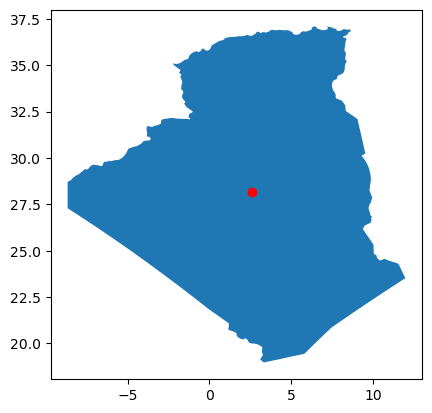

In [364]:
# replotting:

base4326=Algeria.to_crs(4326).plot()
Algeria.to_crs(4326).centroid.plot(color='red',ax=base4326)

In [382]:
Algeria_4326=Algeria.to_crs(4326)

cities_Algeria_4326=citiesAlgeria_clipped.to_crs(Algeria_4326.crs)

rivers_Algeria_4326=riversAlgeria_clipped.to_crs(Algeria_4326.crs)

In [386]:
# saving 
import os

Algeria_4326.to_file(os.path.join("data","AlgeriaMaps_4326.gpkg"), layer='country', driver="GPKG")
cities_Algeria_4326.to_file(os.path.join("data","AlgeriaMaps_4326.gpkg"), layer='cities', driver="GPKG")
rivers_Algeria_4326.to_file(os.path.join("data","AlgeriaMaps_4326.gpkg"), layer='rivers', driver="GPKG")

C:\Users\Luis\anaconda3\Lib\site-packages\geopandas\io\file.py:612: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


In [374]:
Algeria_4326.centroid

C:\Users\Luis\AppData\Local\Temp\ipykernel_5656\204490581.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Algeria_4326.centroid


3    POINT (2.63239 28.16324)
dtype: geometry

In [376]:
Algeria_4326.centroid.to_file(os.path.join("data","AlgeriaMaps_4326.gpkg"), layer='centroid', driver="GPKG")

C:\Users\Luis\AppData\Local\Temp\ipykernel_5656\1090628872.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Algeria_4326.centroid.to_file(os.path.join("data","AlgeriaMaps_4326.gpkg"), layer='centroid', driver="GPKG")


## creando data espacial

In [388]:
import pandas as pd 
infoairports=pd.read_csv(os.path.join("data","airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,K00A,NaN,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
80728,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,Grande Glorieuse,no,NaN,NaN,NaN,NaN,NaN,NaN
80729,346788,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,690.0,NaN,US,US-TX,Blum,no,87TX,NaN,87TX,NaN,NaN,NaN
80730,342102,ZZZW,closed,Scandium City Heliport,69.355287,-138.939310,4.0,NaN,CA,CA-YT,(Old) Scandium City,no,NaN,NaN,NaN,NaN,NaN,"ZZZW, ZZZW, ZYW, YK96"
80731,313629,ZZZZ,small_airport,Satsuma Iōjima Airport,30.784722,130.270556,338.0,AS,JP,JP-46,Mishima,no,RJX7,NaN,RJX7,NaN,http://wikimapia.org/6705190/Satsuma-Iwo-jima-...,"SATSUMA,IWOJIMA,RJX7"


In [390]:
# bye first row 
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
1,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
2,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
3,506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,00AN,NaN,00AN,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [ ]:
# keep the  columns needed

infoairports.columns

In [392]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','municipality']
infoairports=infoairports.loc[:,keep]

In [394]:
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80731 entries, 0 to 80730
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           80731 non-null  object 
 1   type           80731 non-null  object 
 2   latitude_deg   80731 non-null  float64
 3   longitude_deg  80731 non-null  float64
 4   elevation_ft   66106 non-null  float64
 5   municipality   75601 non-null  object 
dtypes: float64(3), object(3)
memory usage: 3.7+ MB


In [396]:
#some formatting 
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now 
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80731 entries, 0 to 80730
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           80731 non-null  object 
 1   type           80731 non-null  object 
 2   latitude_deg   80731 non-null  float64
 3   longitude_deg  80731 non-null  float64
 4   elevation_ft   66106 non-null  float64
 5   municipality   75601 non-null  object 
dtypes: float64(3), object(3)
memory usage: 3.7+ MB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

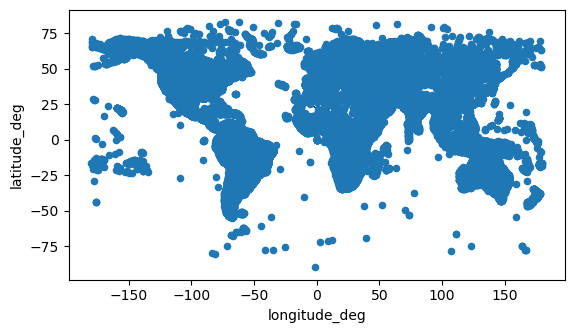

In [398]:
# let's plot

base = Algeria_4326.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [400]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=Algeria.crs.to_epsg())# the coordinates were in degrees - unprojected

<Axes: >

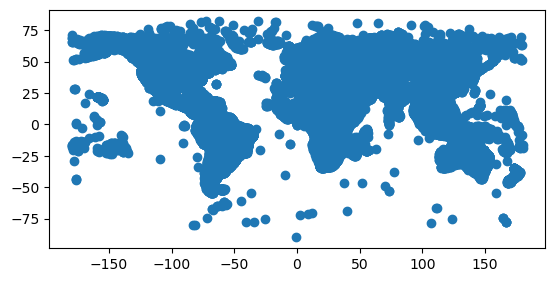

In [402]:
# does it look better?

# let's plot

base = Algeria_4326.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [403]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

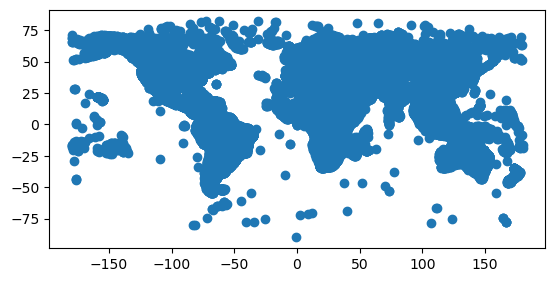

In [404]:
airports_4326=airports.to_crs(4326)

## then

base = Algeria_4326.plot(color='white', edgecolor='black')
airports_4326.plot(ax=base)

In [405]:
airports_4326['type'].value_counts() # this will not work: airports.type.value_counts()

type
small_airport     41515
heliport          20890
closed            11894
medium_airport     4710
seaplane_base      1189
large_airport       476
balloonport          57
Name: count, dtype: int64

In [410]:
airports_4326.rename(columns={'type':'kind'},inplace=True)

In [414]:
# adding the airports
airports_4326.to_file(os.path.join("data","AlgeriaMaps_4326.gpkg"), layer='airports', driver="GPKG")